# Librerias

In [1]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as math

from glob import glob
from collections import OrderedDict
from scipy.optimize import least_squares
from scipy.optimize import curve_fit
from lmfit.models import ConstantModel, LorentzianModel
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter

# Funciones

In [59]:
def gauss(X,X_mean,sigma,C):
  return C*np.exp(-(X-X_mean)**2/(2*sigma**2))

def ploteo_gauss(dt_x, dt_y, y_error, mu_ploteo, sigma_ploteo, C_ploteo, color_ploteo, label_ploteo, x_label, y_label, rtrn=False):

  pop_ploteo, cov_ploteo= curve_fit(f=gauss, xdata= dt_x, ydata= dt_y, p0=[mu_ploteo,sigma_ploteo,C_ploteo], sigma=y_error, maxfev=1000000)

  mu=round(pop_ploteo[0],0)
  sigma=pop_ploteo[1]
  C=pop_ploteo[2]

  fig,ax = plt.subplots()
  plt.errorbar(dt_x,dt_y, yerr=y_error, fmt=".:" , color=color_ploteo , label=label_ploteo)
  plt.plot(dt_x,gauss(dt_x, mu, sigma, C),color='gold')
  plt.vlines(mu, ymin=0, ymax= max(dt_y), color= "red" )
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend()
  plt.show()

  print('El maximo es en el canal: ', round(mu,0), 'y el sigma es: ', sigma, 'La constante C es: ', C)
  print('Las incertezas son: ', np.sqrt(np.diag(cov_ploteo)))


  if rtrn==False:
    return

  elif rtrn==True:
    return mu, sigma, C, np.sqrt(np.diag(cov_ploteo))


def Doble_gauss(X, X_mean1, sigma1, C1, X_mean2, sigma2, C2):
    return C1*np.exp(-(X-X_mean1)**2/(2*sigma1**2)) + C2*np.exp(-(X-X_mean2)**2/(2*sigma2**2))

def ploteo_Doble_gauss(dt_x, dt_y, y_error, mu_ploteo1, sigma_ploteo1, C_ploteo1, mu_ploteo2, sigma_ploteo2, C_ploteo2, color_ploteo, label_ploteo, x_label, y_label, rtrn=False):

  pop_ploteo, cov_ploteo= curve_fit(f=Doble_gauss, xdata= dt_x, ydata= dt_y, sigma=y_error, p0=[mu_ploteo1, sigma_ploteo1, C_ploteo1, mu_ploteo2, sigma_ploteo2, C_ploteo2], maxfev=1000000)

  mu1=pop_ploteo[0]
  sigma1=pop_ploteo[1]
  C1=pop_ploteo[2]

  mu2=pop_ploteo[3]
  sigma2=pop_ploteo[4]
  C2=pop_ploteo[5]

  fig,ax = plt.subplots()
  plt.errorbar(dt_x,dt_y, yerr=y_error, fmt=".:" , color=color_ploteo , label=label_ploteo)
  plt.plot(dt_x,Doble_gauss(dt_x, mu1, sigma1, C1, mu2, sigma2, C2),color='gold')
  plt.vlines(mu1, ymin=0, ymax= max(dt_y), color= "red" )
  plt.vlines(mu2, ymin=0, ymax= max(dt_y), color= "red" )
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend()
  plt.show()

  print('El maximo 1 esta en: ', mu1, 'y el sigma es: ', sigma1, 'La constante C es: ', C1)
  print('El maximo 2 esta en: ', mu2, 'y el sigma es: ', sigma2, 'La constante C es: ', C2)
  print('Las incertezas son: ', np.sqrt(np.diag(cov_ploteo)))

  return

# Datos

In [17]:
Rutas=glob('D:\Genaro\Experimentos Cuanticos II\Exp.-Cuanticos-II\TP3- Fluorecencia\Datos\*.mca')

Datos={}

for ruta in Rutas:

    archivo_completo= os.path.basename(ruta)
    nombre_archivo= os.path.splitext(archivo_completo)[0]

    array=pd.read_csv(ruta, encoding='latin1', header=19, names=['data'], nrows=2048)
    array_norm=array['data']/max(array['data'])

    Colum_Errores= np.sqrt(array['data'])
    err_norm=Colum_Errores/max(array['data'])
    
    Datos[nombre_archivo]=[array['data'], Colum_Errores, array_norm, err_norm]

Co_dat=Datos['Co']
Cu_dat=Datos['Cu']
Mn_dat=Datos['Mn']
Ni_dat=Datos['Ni']
Incog1=Datos['incognita.grupo1']
Incog2=Datos['Incognita 2']

indice=Datos.keys()

canales=np.arange(1,2049,1)

# Calibración

## Espectros

In [4]:
# plt.errorbar(canales, Ni_dat[2], yerr=Ni_dat[3], fmt='o', color='orange')
# plt.xlim(750,950)

# ploteo_gauss(canales[775:845],Ni_dat[2][775:845],Ni_dat[3][775:845], 810, 10, 1, 'red', 'ajuste simple', 'canales', 'Nientas')
# ploteo_gauss(canales[870:920],Ni_dat[2][870:920],Ni_dat[3][870:920], 890, 10, 1, 'red', 'ajuste simple', 'canales', 'Nientas')

Ni_Mus=[807, 892]
Ni_Klines=[7478.15, 8264.66]
Ni_Mus_err=[0.04316397, 0.14705299]

In [5]:
# plt.errorbar(canales, Mn_dat[2], yerr=Mn_dat[3], fmt='o', color='orange')
# plt.xlim(600,725)

# ploteo_gauss(canales[620:660],Mn_dat[2][620:660],Mn_dat[3][620:660], 640, 10, 1, 'red', 'ajuste simple', 'canales', 'Mnentas')
# ploteo_gauss(canales[680:740],Mn_dat[2][680:740],Mn_dat[3][680:740], 720, 10, 1, 'red', 'ajuste simple', 'canales', 'Mnentas')

Mn_Mus=[638, 701]
Mn_Klines=[5898.75, 6490.45]
Mn_Mus_err=[0.04316397, 0.14705299]

In [6]:
# plt.errorbar(canales, Cu_dat[2], yerr=Cu_dat[3], fmt='o', color='orange')
# plt.xlim(800,1000)

# ploteo_gauss(canales[850:900],Cu_dat[2][850:900],Cu_dat[3][850:900], 865, 10, 1, 'red', 'ajuste simple', 'canales', 'cuentas')
# ploteo_gauss(canales[920:1000],Cu_dat[2][920:1000],Cu_dat[3][920:1000], 965, 10, 1, 'red', 'ajuste simple', 'canales', 'cuentas')

Cu_Mus=[869, 961]
Cu_Klines=[8047.78, 8905.29]
Cu_Mus_err=[0.04316397, 0.14705299]

In [7]:
# plt.errorbar(canales, Co_dat[2], yerr=Co_dat[3], fmt='o', color='orange')
# plt.xlim(700,900)

# ploteo_gauss(canales[725:775],Co_dat[2][725:775],Co_dat[3][725:775], 750, 10, 1, 'red', 'ajuste simple', 'canales', 'cuentas')
# ploteo_gauss(canales[800:850],Co_dat[2][800:850],Co_dat[3][800:850], 825, 10, 1, 'red', 'ajuste simple', 'canales', 'cuentas')

Co_Mus=[749, 826]
Co_Klines=[6930.32, 7649.43]
Co_Mus_err=[0.04131984, 0.13320902]

## Ajuste

In [8]:
list_mus=np.array([749, 826, 869, 961, 638, 701, 807, 892])
list_lines=np.array([6930.32, 7649.43, 8047.78, 8905.29, 5898.75, 6490.45,7478.15, 8264.66])
list_names=[r'Co K_\alpha', r'Co K_\beta', r'Cu K_\alpha', r'Cu K_\beta', r'Mn K_\alpha', r'Mn K_\beta', r'Ni K_\alpha', r'Ni K_\beta']
list_color=['orange', 'orange', 'green', 'green', 'red', 'red', 'blue', 'blue']

9.303499880482857 -34.702466237209244


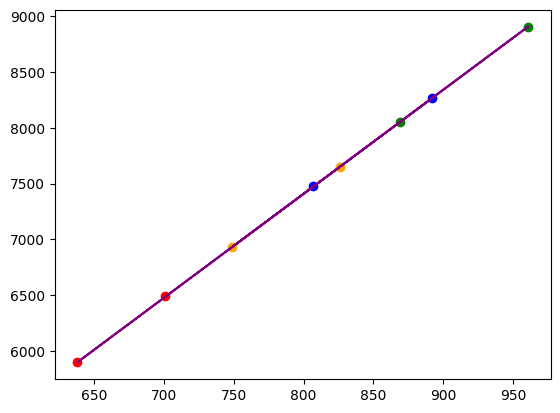

In [10]:
def lineal(x, p, b):
    y=x*p+b
    return y

pop_cal, cov_cal= curve_fit(lineal, list_mus, list_lines)

plt.plot(list_mus, lineal(list_mus, *pop_cal), color='purple')

for i in range(0,8):
    plt.scatter(list_mus[i], list_lines[i], color=list_color[i])

print(*pop_cal)

energias=pop_cal[0]* canales+pop_cal[1]

# Análisis

# Incognita 2

## Incognita 1

proporciones picos 1 y 3: 83.06515131194688 16.934848688053115


(6700.0, 8500.0)

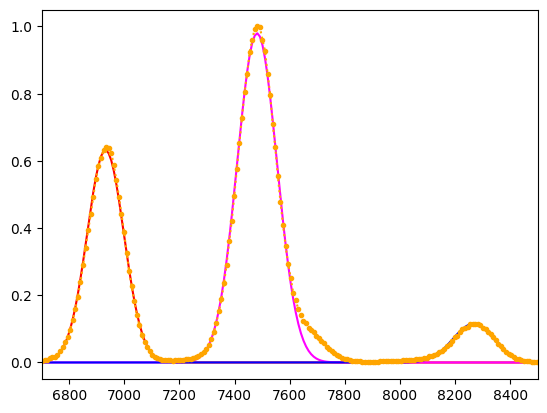

In [69]:
pop_I1_p1, cov_I1_p1= curve_fit(gauss, energias[720:770], Incog1[2][720:770], sigma=Incog2[3][720:770], p0=[6900,10,1])
pop_I1_p2, cov_I1_p2= curve_fit(gauss, energias[780:820], Incog1[2][780:820], sigma=Incog2[3][780:820], p0=[7500,10,1])
pop_I1_p3, cov_I1_p3= curve_fit(gauss, energias[875:910], Incog1[2][875:910], sigma=Incog2[3][875:910], p0=[8290,20,1])

int_I1_p1=pop_I1_p1[2]*pop_I1_p1[1]*np.sqrt(2*np.pi)
int_I1_p3=pop_I1_p3[2]*pop_I1_p3[1]*np.sqrt(2*np.pi)

prop_I1_p1=100*(int_I1_p1/(int_I1_p1+int_I1_p3))
prop_I1_p3=100*(int_I1_p3/(int_I1_p1+int_I1_p3))

print('proporciones picos 1 y 3:', prop_I1_p1, prop_I1_p3)

plt.errorbar(energias, Incog1[2], fmt='.:', color='orange')
plt.plot(energias, gauss(energias, *pop_I1_p1), color='red')
plt.plot(energias, gauss(energias, *pop_I1_p2), color='magenta')
plt.plot(energias, gauss(energias, *pop_I1_p3), color='blue')
plt.xlim(6700,8500)

Tenemos que el primer pico de 6931 keV corresponde al pico K $_\alpha$ del Co, el pico de 8267 keV corresponde con el pico K $_\beta$ del Ni. Luego, el pico suma es entonces la superposición del pico K $_\beta$ del Co y el pico K $_\alpha$ del Ni.